# Practical Data Science - Airbnb assignment
## MSc Data Science Part-Time
## Kostis Konstantinos (p3352311)


### A note on environment setup for reproducibility

This Jupyter Notebook was produced on a Mac OS X.

- CPU: 2,6 GHz Dual-Core Intel Core i5
- OS Version: Catalina 10.15.7
- Memory: 16 GB 1600 MHz DDR3
- Graphics: Intel Iris 1536 MB

The version of python used is `3.10.6` via `pyenv`.

Regarding the python dependencies:

A `environment.yml` file is included so if you have conda/miniconda installed, then feel free to run:

```bash
conda env create -f environment.yml
```

in your terminal.


Otherwise a `requirements.txt` file is also included, and you may use it as you wish to create an environment.
For example:

```bash
conda create --name practical_data_science --file requirements.txt
```

## Download the needed csv files (optional)

If `listings.csv.gz`, `calendar.csv.gz`, `reviews.csv.gz` are not included, then uncomment and run the following 3 cells
in order to download them as they are needed.

In [1]:
#!wget http://data.insideairbnb.com/greece/attica/athens/2023-09-21/data/listings.csv.gz .

In [2]:
#!wget http://data.insideairbnb.com/greece/attica/athens/2023-09-21/data/calendar.csv.gz . 

In [3]:
#!wget http://data.insideairbnb.com/greece/attica/athens/2023-09-21/data/reviews.csv.gz .

## Unzip the csv files

In [4]:
!gunzip -k listings.csv.gz

In [5]:
!gunzip -k calendar.csv.gz

In [6]:
!gunzip -k reviews.csv.gz

## Importing the needed libraries for analysis

In [7]:
# Lets import the necessary libraries for the assignment
import pandas as pd
import numpy as np

import folium
from folium import plugins

from sklearn.metrics.pairwise import euclidean_distances

## Question 1: Neighbourhood Listings in Descending Order

In this question we will list neighbourhoods in descending order. In order to do that we will use `listings.csv.gz` which has been unzipped and saved as `listings.csv`. We will start by loading the csv into pandas, displaying a few rows and display basic information on the dataframe.

In [8]:
# load the listings dataset
listings_df = pd.read_csv('listings.csv')
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20230921043851,2023-09-21,city scrape,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,...,4.88,4.60,4.74,00000957568,t,7,7,0,0,0.28
1,10990,https://www.airbnb.com/rooms/10990,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,...,4.89,4.78,4.75,00001070920,t,7,7,0,0,0.49
2,10993,https://www.airbnb.com/rooms/10993,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,...,4.98,4.82,4.79,00000957080,t,7,7,0,0,0.69


In [9]:
# column info and data shape
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12955 entries, 0 to 12954
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            12955 non-null  int64  
 1   listing_url                                   12955 non-null  object 
 2   scrape_id                                     12955 non-null  int64  
 3   last_scraped                                  12955 non-null  object 
 4   source                                        12955 non-null  object 
 5   name                                          12955 non-null  object 
 6   description                                   12922 non-null  object 
 7   neighborhood_overview                         8076 non-null   object 
 8   picture_url                                   12955 non-null  object 
 9   host_id                                       12955 non-null 

The candidate columns to be used are `neighbourhood` and `neighbourhood_cleansed` but since there are missing values
in the `neighbourhood` column according to the info() command above, then we will use the `neighbourhood_cleansed`.

Since the assignment does not define the `popularity` criterion of neighbourhoods, we will define it as the number of times a neighbourhood appears in the dataframe.

Hence, using `value_counts` will give us the ranking of the neighbourhoods.

In [10]:
neighbourhoods_popularity_df = listings_df['neighbourhood_cleansed'].value_counts()
neighbourhoods_popularity_df = neighbourhoods_popularity_df.reset_index()

neighbourhoods_popularity_df

,neighbourhood_cleansed,count
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
2,ΝΕΟΣ ΚΟΣΜΟΣ,980
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
5,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
6,ΠΑΓΚΡΑΤΙ,511
7,ΑΜΠΕΛΟΚΗΠΟΙ,452
8,ΚΟΛΩΝΑΚΙ,425
9,ΘΗΣΕΙΟ,386


We have not finished :-)

We need to sort the listings using the neighbourhood ranking that we previously found.
The listings will be sorted based on the most popular neighbourhood first.

**Methodology:** Merge the listings dataframe with the neighbourhoods popularity dataframe. Then simply
sort the listings value with descending neighbourhood popularity ranking (which is named count).

In [11]:
sorted_listings_by_neighbourhood_popularity_df = listings_df.merge(neighbourhoods_popularity_df,
                                                                   how='inner', on='neighbourhood_cleansed')
sorted_listings_by_neighbourhood_popularity_df = sorted_listings_by_neighbourhood_popularity_df.sort_values('count', ascending=False)

sorted_listings_by_neighbourhood_popularity_df.head(3000)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,count
3930,884365273771196812,https://www.airbnb.com/rooms/884365273771196812,20230921043851,2023-09-21,city scrape,Rental unit in Athina · ★4.36 · 1 bedroom · 2 ...,<b>Registration number</b><br />00604449095,The location of the apartment is truly unbeata...,https://a0.muscache.com/pictures/miso/Hosting-...,33626433,...,3.75,4.50,00604449095,f,18,2,1,15,6.14,2416
2363,31039790,https://www.airbnb.com/rooms/31039790,20230921043851,2023-09-21,previous scrape,Hotel in Athina · 1 bedroom · 1 bed · 1 privat...,"32 sq.m. - Modern decoration, fully soundproof...",The scenic Plaka and the lively Monastiraki ar...,https://a0.muscache.com/pictures/7305ce5f-bb9c...,231837659,...,NaN,NaN,NaN,f,5,0,5,0,NaN,2416
2352,30917034,https://www.airbnb.com/rooms/30917034,20230921043851,2023-09-21,city scrape,Rental unit in Athina · ★4.92 · 2 bedrooms · 3...,"A unique and bright apartment, on the 2nd floo...",Although the apartment is in the heart of Athe...,https://a0.muscache.com/pictures/5bef5103-8cb1...,10581143,...,4.97,4.89,00000497757,t,10,10,0,0,2.58,2416
2353,30919919,https://www.airbnb.com/rooms/30919919,20230921043851,2023-09-21,previous scrape,Rental unit in Athina · 3 bedrooms · 5 beds · ...,Renovated classy 1955 apartment in the heart o...,NaN,https://a0.muscache.com/pictures/b9e0d62d-53e4...,231062739,...,5.00,5.00,NaN,f,1,1,0,0,0.12,2416
2354,30922142,https://www.airbnb.com/rooms/30922142,20230921043851,2023-09-21,city scrape,Home in Athina · ★4.93 · 1 bedroom · 1 bed · 1...,Welcome to Greece and Athens city in Plaka his...,"The amazing neighborhood of Plaka, also known ...",https://a0.muscache.com/pictures/16373167-356f...,230667592,...,5.00,4.67,00001435657,t,2,2,0,0,0.26,2416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8932,45513138,https://www.airbnb.com/rooms/45513138,20230921043851,2023-09-21,city scrape,Rental unit in Athina · ★4.21 · 1 bedroom · 1 ...,If the classic luxury of this fully renovated ...,Discover the most historic & picturesque Athen...,https://a0.muscache.com/pictures/f5301039-976c...,278825381,...,4.71,4.21,00001084781,t,30,19,11,0,0.39,1122
9291,841137872241827082,https://www.airbnb.com/rooms/841137872241827082,20230921043851,2023-09-21,city scrape,Rental unit in Athina · ★3.80 · 2 bedrooms · 2...,Brand new apartment in Koukaki GTD3125-01<br /...,"The area:<br /><br />Welcome to Athens, the vi...",https://a0.muscache.com/pictures/prohost-api/H...,389742996,...,4.20,4.20,00001834150,t,16,16,0,0,1.33,1122
9285,840495495044753232,https://www.airbnb.com/rooms/840495495044753232,20230921043851,2023-09-21,city scrape,Rental unit in Athina · 2 bedrooms · 3 beds · ...,Το διαμέρισμα βρίσκεται σε εξαιρετική τοποθεσί...,"Δίνουμε προτεραιότητα στην καθαριότητα, απολυμ...",https://a0.muscache.com/pictures/miso/Hosting-...,506480884,...,5.00,5.00,00001950418,f,1,1,0,0,0.17,1122
9286,840679904053100000,https://www.airbnb.com/rooms/840679904053100000,20230921043851,2023-09-21,city scrape,Rental unit in Athina · 2 bedrooms · 1 bed · 1...,Όλη η παρέα θα είναι άνετη σε αυτόν τον ευρύχω...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,240481675,...,NaN,NaN,00001975132,t,32,32,0,0,NaN,1122


## Question 2: Neighbourhood Prices in Descending Order

In this part, we will create a table regarding descriptive statistics on neighbourhoods.

Per neighbourhood we will find:
- median price
- mean price
- standard deviation
- number of lististings

It is **important** to note that the `price` column does not contain any nulls (according to the `pandas info()` run previously), hence we are good to go for further analysis, constructing the needed table without having to perform a `fillna` operation.

**Methodology**: A simple `groupby` operation, followed by `agg` with the correct functions and finally sorting by median price in descending mode, will give us the answer to the question.

Before operating on prices we need to check the column `price` and convert it into a numerical representation since the detected
type of the column was set as `object` by pandas.

In [12]:
listings_df['price'].unique()

array(['$144.00', '$70.00', '$85.00', '$60.00', '$35.00', '$50.00',
       '$99.00', '$39.00', '$30.00', '$31.00', '$180.00', '$48.00',
       '$32.00', '$45.00', '$350.00', '$75.00', '$300.00', '$63.00',
       '$55.00', '$77.00', '$59.00', '$37.00', '$368.00', '$74.00',
       '$109.00', '$94.00', '$116.00', '$140.00', '$92.00', '$56.00',
       '$98.00', '$67.00', '$407.00', '$278.00', '$65.00', '$46.00',
       '$212.00', '$114.00', '$58.00', '$90.00', '$150.00', '$154.00',
       '$364.00', '$82.00', '$120.00', '$210.00', '$110.00', '$83.00',
       '$182.00', '$38.00', '$84.00', '$433.00', '$72.00', '$40.00',
       '$62.00', '$68.00', '$724.00', '$80.00', '$102.00', '$552.00',
       '$160.00', '$25.00', '$53.00', '$69.00', '$33.00', '$600.00',
       '$130.00', '$190.00', '$28.00', '$100.00', '$115.00', '$79.00',
       '$767.00', '$159.00', '$132.00', '$44.00', '$49.00', '$71.00',
       '$93.00', '$143.00', '$106.00', '$88.00', '$91.00', '$1,050.00',
       '$19.00', '$247.00

Right! So the prices contain the dollar sign and the comma character! Hence pandas correctly set the column type to object.
We can create a new column `price_numeric` instead of overwriting the current one, and then we will operate
onto the new column. After all, the dataset is small so the additional column will not add overhead to the memory.

In [13]:
# create a method (for reusability) that manipulates price and converts it to numeric
def price_to_numeric(price_series):
    out_series = price_series.str.replace('$', '').str.replace(',', '')
    out_series = out_series.astype('float')

    return out_series

# create a numerical price column
listings_df['price_numeric'] = price_to_numeric(listings_df['price'])

In [14]:
# create the table/dataframe for neighbourhoud prices and number of listings
neighbourhood_prices_df = listings_df.groupby(['neighbourhood_cleansed']).agg(
    neighbourhood_median_price=pd.NamedAgg(column='price_numeric', aggfunc='median'),
    neighbourhood_mean_price=pd.NamedAgg(column='price_numeric', aggfunc='mean'),
    neighbourhood_stdev_price=pd.NamedAgg(column='price_numeric', aggfunc='std'),
    neighbourhood_n_listings=pd.NamedAgg(column='listing_url', aggfunc='count')
).sort_values(by='neighbourhood_median_price', ascending=False)

neighbourhood_prices_df

,neighbourhood_median_price,neighbourhood_mean_price,neighbourhood_stdev_price,neighbourhood_n_listings
neighbourhood_cleansed,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.800000,578.622675,5
ΖΑΠΠΕΙΟ,114.0,224.068323,641.163173,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.650662,229.183015,2416
ΑΚΡΟΠΟΛΗ,100.0,195.344560,703.321565,386
ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284314,104.613533,1122
ΘΗΣΕΙΟ,90.0,126.492228,124.176775,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883382,136.367487,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162


## Question 3: Availability per Day

In this question we are interested in finding availabilities per day. More specifically we need to create a graph
where on the y-axis we have the number of available listings and on the x-axis we have a date.

To do that we will need another csv file, namely `calendar.csv` which contains per day the availability of each listing.

**Methodology:** Lets load the data first and inspect them. Identify the listing-id, availaibility and date columns.
We need to merge the calendar and listings data frames to ensure that our listings exist in calendar data.
We will need to check if left (i.e using as keys the ids of the listings dataframe) and inner (i.e the common listing ids) join will produce the same output or if they are not then we need to understand what is wrong.
Then we should keep only the listings which are available. Lastly, group by date and count the listings. After that plot the data.

In [15]:
calendar_df = pd.read_csv('calendar.csv')

calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728229 entries, 0 to 4728228
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 252.5+ MB


In [16]:
# create a data frame that contains the ids of the listings
q3_df = pd.DataFrame(columns=['listing_id'])
q3_df['listing_id'] = listings_df['id']

# merge q3_df with calendar df
inner_df = q3_df.merge(calendar_df, how='inner', on='listing_id')
left_df = q3_df.merge(calendar_df, how='left', on='listing_id')

In [17]:
# equality check for joins
(inner_df == left_df).eq(True).all()

listing_id        True
date              True
available         True
price             True
adjusted_price    True
minimum_nights    True
maximum_nights    True
dtype: bool

<Axes: title={'center': 'Availbility per Day'}, xlabel='Date', ylabel='Number of Available Listings'>

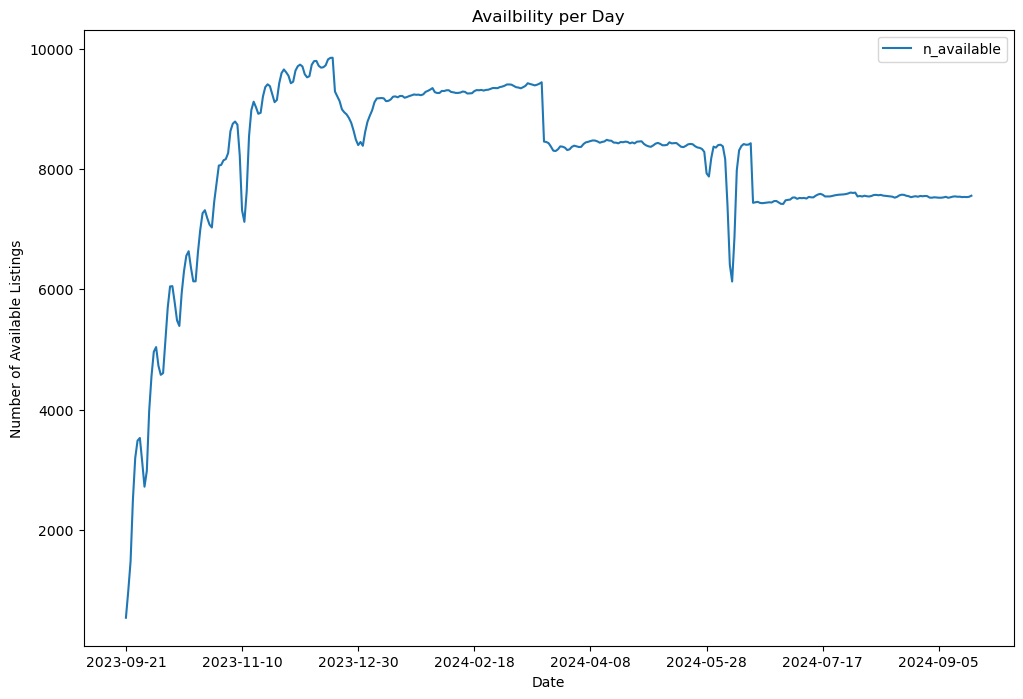

In [18]:
# all is good so we can continue using the inner_df

# keep only the available listings
inner_df = inner_df[inner_df.available == 't']

# now, group by date and count the entries of each group
availability_by_date_df = inner_df.groupby(['date']).size()

# reset the index and rename the size column
availability_by_date_df = availability_by_date_df.reset_index()
availability_by_date_df.rename(columns={0: 'n_available'}, inplace=True)

availability_by_date_df.plot(x='date', y='n_available',
                             title='Availbility per Day', xlabel='Date', ylabel='Number of Available Listings',
                             figsize=(12, 8))

**Observe** from the plot, that the most available listings are for about a whole month from `2023-11-13 (November 13)` to about `2023-12-25`. This might be because of the Christmas period, where people want to spend the holidays with their families instead of renting houses in Athens :-)

## Question 4: Reviews, Occupacy per Listing, Average Income
In this question we need to answer multiple things so lets start!

### Reviews
We need to calculate a histogram showing the number of reviews, with binning! From the smallest number to the max per listing and rounding to the closest hundrend.

But first we need to load the reviews data. So, we will use the `reviews.csv` data.

**Methodology:** Group the reviews dataframe by the listing_id. Then simply count. Reset the index of the dataframe and rename count to `n_reviews`. Then, sort the values by n_reviews in ascending order and round the column values to the nearest hundrend.
For the number of bins, we will implement a well known and robust methodology named `Freedman-Diaconis` rule. You can find the rule for
the bin width in [wikipedia](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule).
We will also use a simple binning methodology based on the unique values of the rounded results.
Finally we will plot both histograms with the computed bins.

**Observe that:** Python's round method has a weird behavior regarding rounding to the closest hundrend. For example:


```python
In [1]: round(50, -2)
Out[1]: 0

In [2]: round(150, -2)
Out[2]: 200

In [3]: round(250, -2)
Out[3]: 200

In [4]: round(350, -2)
Out[4]: 400

In [5]: round(450, -2)
Out[5]: 400

In [6]: round(550, -2)
Out[6]: 600

In [7]: round(650, -2)
Out[7]: 600

In [8]: round(750, -2)
Out[8]: 800

In [9]: round(850, -2)
Out[9]: 800
```

So, we will write our own algorithm that transforms an integer to the nearest hundred and is consistent in the cases shown above. More specifically, when the modulo with 100 is greater than or equal to 50 then the number will moved to the next hundrend, else the number will be moved to the previous hundrend.

In [19]:
# a method to convert an integer to the nearest hundrend
def to_nearest_hundrend(x):
    remainder = x % 100
    if remainder >= 50:
        return x + (100 - remainder)
    else:
        return x - remainder

In [20]:
reviews_df = pd.read_csv('reviews.csv')
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630578 entries, 0 to 630577
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  630578 non-null  int64 
 1   date        630578 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.6+ MB


Computed bins from FD: 100


<Axes: title={'center': 'Number of Reviews Per Listing'}, xlabel='Number of Reviews', ylabel='Frequency'>

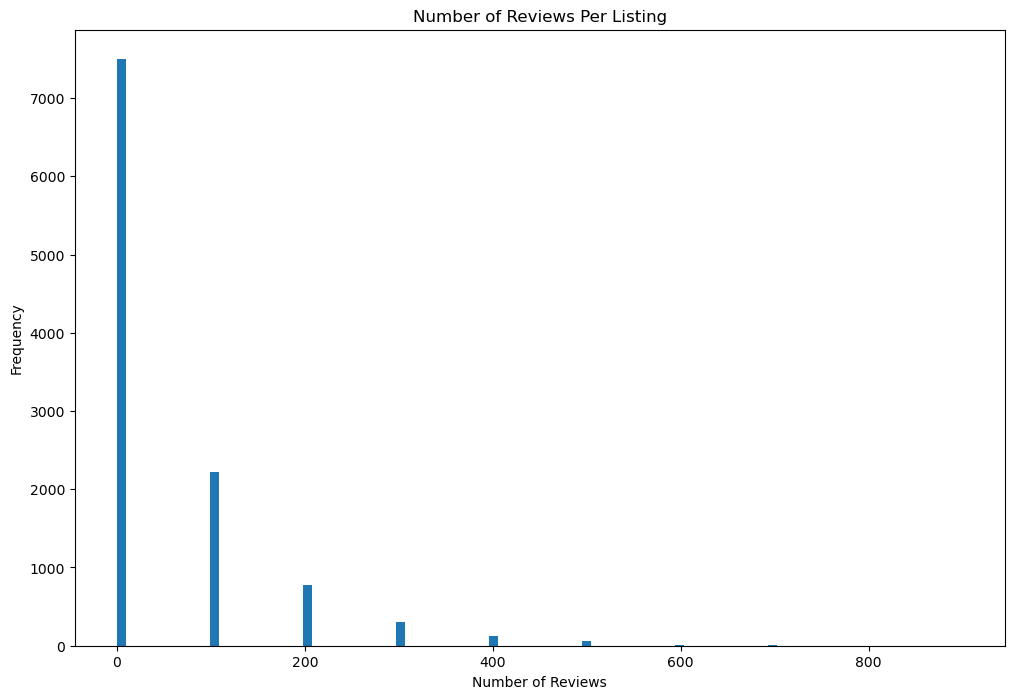

In [21]:
# group, count and round :-)
reviews_by_listing_df = reviews_df.groupby(['listing_id']).size().reset_index(name='n_reviews')
reviews_by_listing_df.sort_values(by=['n_reviews'], ascending=True)
reviews_by_listing_df['n_reviews'] = reviews_by_listing_df['n_reviews'].apply(lambda x: to_nearest_hundrend(x))

# Implement Freedman-Diaconis
def freedman_diaconis(series):
    quartiles = series.quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]

    bin_width = 2 * iqr
    bin_width /= len(series)**(1./3)
    numerator = max(series) - min(series)
    bins = round(numerator / bin_width)

    return bins

histogram_bins = freedman_diaconis(reviews_by_listing_df['n_reviews'])
print('Computed bins from FD: {}'.format(histogram_bins))

reviews_by_listing_df['n_reviews'].plot(kind='hist',
                                        title='Number of Reviews Per Listing',
                                        xlabel= 'Number of Reviews',
                                        figsize=(12, 8),
                                        bins=histogram_bins)

Lets check what happens in the graph if we set the number of bins equal to the length of the unique
values that have been rounded to the nearest hundrend.

Simple bins: 10


<Axes: title={'center': 'Number of Reviews Per Listing'}, xlabel='Number of Reviews', ylabel='Frequency'>

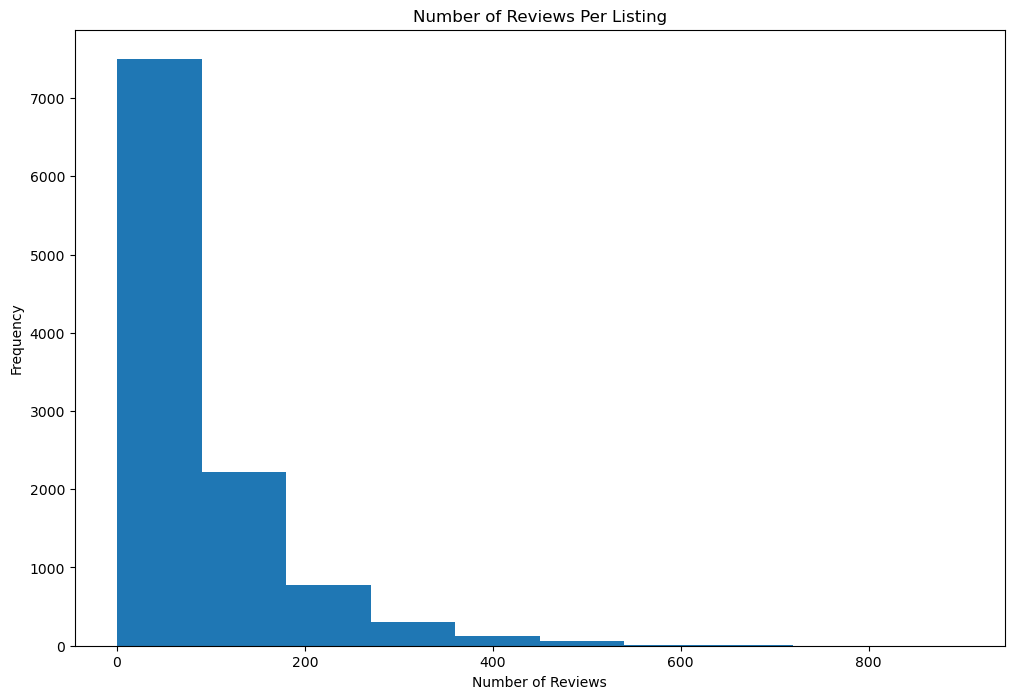

In [22]:
bins = reviews_by_listing_df.n_reviews.nunique()
print('Simple bins: {}'.format(bins))

reviews_by_listing_df['n_reviews'].plot(kind='hist',
                                        title='Number of Reviews Per Listing',
                                        xlabel= 'Number of Reviews',
                                        figsize=(12, 8),
                                        bins=bins)

So, the histogram is a bit different now. This is logical since the number of bins is much smaller than the bins computed via Freedman-Diaconis. You can see that the width of the bins is much larger now, than before.
But, whichever graph we choose, the information depicted is the same. Both graphs follow a power-law like distribution. Observe that the large majority of the listings have between 0 and 100 reviews. On the very tail we can see that there are extremely few houses (perhaps around 50 judging by the graph) that have more than 500 reviews.

### Occupacy per listing
Here, we need to compute the average occupacy per listing per month. To calculate that, we must find the average reviews per month and assume that half of the bookings result in reviews.

Again we will use the reviews dataset.

**Methodology:** From the reviews date we will extract the month component. Then we must groupy by `listing_id AND month` and take the size of each group as the number of reviews (will be named `n_reviews`). According to the exercise, we have to double `n_reviews` in order to find the number of bookings (will be named `n_bookings`.

In [23]:
# create a temp dataframe and extract month
temp_df = pd.DataFrame(reviews_df)
temp_df['month'] = pd.to_datetime(temp_df['date']).dt.month

# group by listing_id and month
bookings_df = temp_df.groupby(['listing_id', 'month']).size().reset_index(name='n_reviews')

# calculate n_bookings by doubling n_reviews
bookings_df['n_bookings'] = bookings_df['n_reviews'] * 2

bookings_df

,listing_id,month,n_reviews,n_bookings
0,10595,1,3,6
1,10595,2,4,8
2,10595,3,3,6
3,10595,4,3,6
4,10595,5,6,12
...,...,...,...,...
80093,975413215364080586,9,4,8
80094,975966554881091774,9,1,2
80095,976076532701121190,9,1,2
80096,977373669051180593,9,2,4


### Average income
Now, we need to calculate the average income per month for every listing.
According to the exercise, each booking corresponds to 3 nights of stay.
Also we need to use the average price charged throughout all listings.

**Methodology:**
- Calculate the average price per month: Using the listings that are not available (aka rented), from the calendar dataset we extract the month component. We create a data frame by grouping on `month` and `listing_id` and for every group we compute the price by applying the sum aggregation. Then we create a `per_month` dataframe, with 4 columns: `month` (as index), `price_sum` as the sum of all prices for a month (again using groupby), `n_listings` as the number of listings for a month (again using groupby) and the `avg_price` by dividing the `price_sum` by `n_listings`.

- Update the bookings dataframe: Using the fact that each booking corresponds to a 3 nights stay, we compute `n_reservation_days` by multiplying `n_bookings` by 3.

- Collect and process per month: In order to avoid using loops, we manually extract each month from the bookings dataframe into a separate dataframe. Each separate dataframe is updated by computing `average_income` as the result of multiplication of `avg_price` with `n_reservation_days`.

- Consolidation: For presentation reasons we concat all individual month dataframes into one `month_bookings_df` and convert the `price` from a numerical representation to a string and prepending the dollar sign.

In [24]:
# 1. Calculate the Average Price Per Month

# keep only the listings that are not available for some day
# (these are actually getting charged because someone rented the house)
charged_listings = pd.DataFrame(calendar_df[calendar_df.available == 'f'])

# extract the month component from the date
charged_listings['month'] = pd.to_datetime(charged_listings.date).dt.month

# convert price to numeric
charged_listings['price'] = price_to_numeric(charged_listings['price'])

# drop date, available columns (to save some space)
charged_listings.drop(['date', 'available'], axis=1, inplace=True)

# create a prices dataframe which holds the total price per month and per listing
prices = charged_listings.groupby(['listing_id', 'month']).agg(
    price_sum=pd.NamedAgg(column='price', aggfunc='sum')
).reset_index()

# create a per_month dataframe which will per month hold:
# the total price (price_sum)
# the number of listings (n_listings)
# their division (aka average price per month - avg_price)
per_month = pd.DataFrame(prices.groupby(['month'])['price_sum'].sum().reset_index())

# find the number of listings per month and persist it into month_listings dataframe
month_listings = prices.groupby(['month'])['listing_id'].size().reset_index(name='n_listings')

# merge month_listings into per_month dataframe
per_month = per_month.merge(month_listings, on='month')

# calculate the average price per month
per_month['avg_price'] = per_month['price_sum'] / per_month['n_listings']

# set the month as index (for lookups)
per_month.set_index('month', inplace=True)

# 2. Update the bookings dataframe with number of reservations
bookings_df['n_reservation_days'] = bookings_df['n_bookings'] * 3

# 3. Collect every month to a dataframe (to avoid using loops)
january = pd.DataFrame(bookings_df[bookings_df.month == 1])
february = pd.DataFrame(bookings_df[bookings_df.month == 2])
march = pd.DataFrame(bookings_df[bookings_df.month == 3])
april = pd.DataFrame(bookings_df[bookings_df.month == 4])
may = pd.DataFrame(bookings_df[bookings_df.month == 5])
june = pd.DataFrame(bookings_df[bookings_df.month == 6])
july = pd.DataFrame(bookings_df[bookings_df.month == 7])
august = pd.DataFrame(bookings_df[bookings_df.month == 8])
september = pd.DataFrame(bookings_df[bookings_df.month == 9])
october = pd.DataFrame(bookings_df[bookings_df.month == 10])
november = pd.DataFrame(bookings_df[bookings_df.month == 11])
december = pd.DataFrame(bookings_df[bookings_df.month == 12])

# 4. Process each month by calculating the average income per listing
january['average_income'] = january['n_reservation_days'] * per_month.loc[1]['avg_price']
february['average_income'] = february['n_reservation_days'] * per_month.loc[2]['avg_price']
march['average_income'] = march['n_reservation_days'] * per_month.loc[3]['avg_price']
april['average_income'] = april['n_reservation_days'] * per_month.loc[4]['avg_price']
may['average_income'] = may['n_reservation_days'] * per_month.loc[5]['avg_price']
june['average_income'] = june['n_reservation_days'] * per_month.loc[6]['avg_price']
july['average_income'] = july['n_reservation_days'] * per_month.loc[7]['avg_price']
august['average_income'] = august['n_reservation_days'] * per_month.loc[8]['avg_price']
september['average_income'] = september['n_reservation_days'] * per_month.loc[9]['avg_price']
october['average_income'] = october['n_reservation_days'] * per_month.loc[10]['avg_price']
november['average_income'] = november['n_reservation_days'] * per_month.loc[11]['avg_price']
december['average_income'] = december['n_reservation_days'] * per_month.loc[12]['avg_price']

# concat dataframes into a big one :-)
month_bookings = [
    january, february, march, april, may, june,
    july, august, september, october, november, december
]

month_bookings_df = pd.concat(month_bookings)

# for presentation reasons manipulate price to put back the dollar sign
month_bookings_df['average_income'] = '$' + month_bookings_df['average_income'].round(2).astype(str)

month_bookings_df

,listing_id,month,n_reviews,n_bookings,n_reservation_days,average_income
0,10595,1,3,6,18,$106339.29
11,10990,1,10,20,60,$354464.3
23,10993,1,17,34,102,$602589.31
35,10995,1,2,4,12,$70892.86
45,27262,1,2,4,12,$70892.86
...,...,...,...,...,...,...
72688,784455206340476330,12,1,2,6,$17551.85
72701,784719860855398969,12,1,2,6,$17551.85
72804,786700736827591297,12,1,2,6,$17551.85
72827,786844914869152030,12,1,2,6,$17551.85


## Question 5: Listings per Room Type

In this question we need to answer the following:
- Per room type, find the number of listings and display as absolute number and percentage
- Per neighbourhood and room type, find the number of listings and display as absolute number and percentage.

We will answer each one separately so lets go!

### Per room type

**Methodology:**
- Group the listings dataframe per room_type
- Count the number of listings per room type
- Sum the number of listings per room type
- Divide the count by the sum to get the percentage
- Drop the column for the sum of listings

In [25]:
# group by room-type and count the number of listings
per_room_type_listings = listings_df.groupby(['room_type']).agg(
    n_listings=pd.NamedAgg(column='id', aggfunc='count')
)

# create a dataframe to hold the number of listings as absolute number and percentage
per_room_type_df = pd.DataFrame(per_room_type_listings).reset_index()

# sum the number of listings
per_room_type_df['sum_listings'] = per_room_type_df.n_listings.sum()

# compute the number of listings as percentage
per_room_type_df['n_listings_percent'] = per_room_type_df['n_listings'] / per_room_type_df['sum_listings']

# drop the auxiliary comlumn with the sum of listings
per_room_type_df.drop('sum_listings', axis=1, inplace=True)

per_room_type_df

,room_type,n_listings,n_listings_percent
0,Entire home/apt,11652,0.899421
1,Hotel room,105,0.008105
2,Private room,1113,0.085913
3,Shared room,85,0.006561


### Per neighbourhood and room type

Apart from the number of listings as absolute number, per neighbourhood and room-type we will also calculate
the percentage of room types per neighbourhood. Check the methodology below.

**Methodology:**
- Group by `neighbourhood_cleansed` and `room_type`
- Then count the number of listings for these groups (`n_listings`)
- Group by `neighbourhood_cleansed` and simply count the number of listings (`n_neighbourhood_listings` as the denominator)
- Simply divide `n_listings` by `n_neighbourhood_listings` to get the percentage of room-type percentage per neighbourhood

In [26]:
# group by neighboorhood and room-type
# then count the number of listings
per_neighbourhood_room_type_listings = listings_df.groupby(['neighbourhood_cleansed', 'room_type']).agg(
    n_listings=pd.NamedAgg(column='id', aggfunc='count')
)

# create a dataframe to hold the number of listings as absolute number and percentage
per_neighbourhood_room_type_df = pd.DataFrame(per_neighbourhood_room_type_listings).reset_index()

# find the number of listings per neighbourhood
listings_per_neighbourhood = per_neighbourhood_room_type_listings.groupby(['neighbourhood_cleansed'])['n_listings'].sum()\
  .reset_index(name='n_neighborhood_listings')

# merge listings_per_neighbourhood into per_neighbourhood_room_type_df
per_neighbourhood_room_type_df = per_neighbourhood_room_type_df.merge(listings_per_neighbourhood, on='neighbourhood_cleansed')

# compute the percentage of room-type per neighbourhood
per_neighbourhood_room_type_df['room_type_per_neighbourhood_percent'] = per_neighbourhood_room_type_df['n_listings'] / per_neighbourhood_room_type_df['n_neighborhood_listings']

per_neighbourhood_room_type_df.head(10)

,neighbourhood_cleansed,room_type,n_listings,n_neighborhood_listings,room_type_per_neighbourhood_percent
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,Entire home/apt,55,55,1.000000
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Entire home/apt,33,38,0.868421
2,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Private room,5,38,0.131579
3,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,686,817,0.839657
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Hotel room,4,817,0.004896
5,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Private room,117,817,0.143207
6,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Shared room,10,817,0.012240
7,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,Entire home/apt,91,99,0.919192
8,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,Private room,8,99,0.080808
9,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,Entire home/apt,74,76,0.973684


## Question 6: Prices per Day

In this question we need to:
- Create a table with the average price per listing per day.
- Visualize the table using a graph

**Methodology:**
- Create a new column `price_num` which corresponds to the numerical representation of `price` column
- Using the calendar dataframe, group by `listing_id` and `date`
- Aggregate using sum on price (`sum_price` as numerator)
- Aggregate using count ( `group_count` i.e number of groups, as denominator)
- Divide `sum_price` by `group_count` to obtain the average price per listing per day.

<Axes: title={'center': 'Prices Per Day'}, xlabel='Day', ylabel='Average Price'>

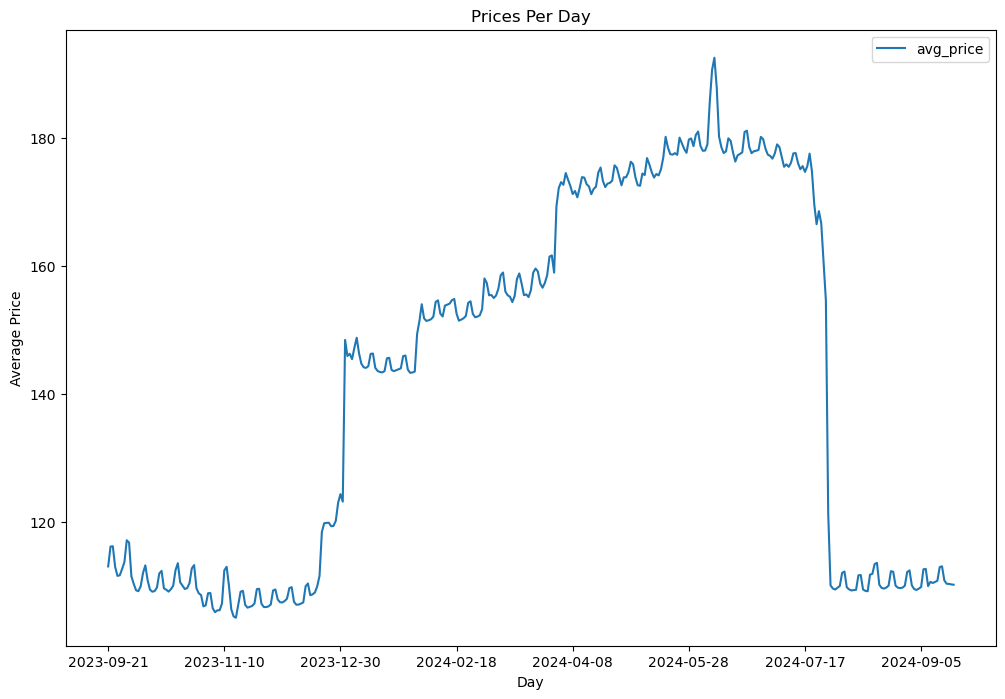

In [27]:
# create a new numerical column for price
calendar_df['price_num'] = price_to_numeric(calendar_df['price'])

# group by date
prices_per_day = calendar_df.groupby(['date']).agg(
    avg_price=pd.NamedAgg(column='price_num', aggfunc='mean'),
).reset_index()

# visualize the table
prices_per_day.plot(x='date', y='avg_price',
                    title='Prices Per Day', xlabel='Day', ylabel='Average Price',
                     figsize=(12, 8))

**Observe** that the highest average price for this graph occurs in the first days of June 2024.

Note: This data is in the future! What the hell? :-) Read the [data assumptions here](http://insideairbnb.com/data-assumptions/)

In [28]:
prices_per_day.sort_values(by='avg_price', ascending=False).head(5)

,date,avg_price
261,2024-06-08,192.584684
260,2024-06-07,190.668597
262,2024-06-09,187.961093
259,2024-06-06,185.654624
275,2024-06-22,181.186120


## Question 7: Listings per Host

In this question we will find and plot the number of listings per host.

**Methodology:**
- Group listings by `host_id`
- Count the number of listings, using `id` (named `n_host_listings`)
- Order the data in descending order using `n_host_listings`
- Assign a rank to each entry, from 1 up to the number of entries (named `ranking`)
- Take the log of ranking (named `log_ranking`)
- Create a distribution plot for each type of ranking.

In [29]:
# group by host and count the listings
by_host = listings_df.groupby(['host_id']).agg(
    n_listings=pd.NamedAgg(column='id', aggfunc='count')
).reset_index()

# sort by n_listings descending
by_host = by_host.sort_values(by='n_listings', ascending=False)

# assign ranking (add 1 to match the length of the index)
by_host['ranking'] = range(1, len(by_host) + 1)

# assign logarithmic ranking
by_host['log_ranking'] = np.log(by_host.ranking)

by_host

,host_id,n_listings,ranking,log_ranking
607,20104194,114,1,0.000000
2069,113548208,88,2,0.693147
1811,90390850,78,3,1.098612
60,748818,74,4,1.386294
1149,47267002,61,5,1.609438
...,...,...,...,...
2242,130728079,1,5770,8.660427
2241,130646248,1,5771,8.660601
2240,130612477,1,5772,8.660774
2239,130551473,1,5773,8.660947


<Axes: title={'center': 'Ranking of hosts based on number of listings'}, xlabel='Host Ranking', ylabel='Number of listings'>

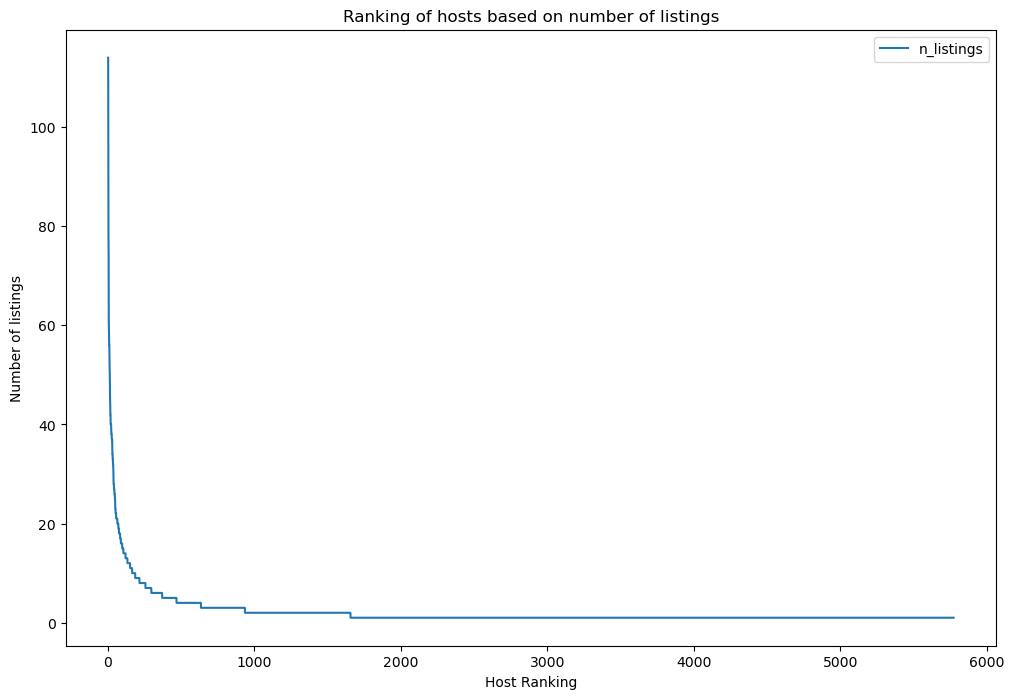

In [30]:
# plot ranking distribution plot
by_host.plot(x='ranking', y='n_listings',
             title='Ranking of hosts based on number of listings',
             xlabel='Host Ranking', ylabel='Number of listings',
             figsize=(12, 8))

<Axes: title={'center': 'Ranking of hosts based on number of listings'}, xlabel='Host Ranking (in Logarithmic scale)', ylabel='Number of listings'>

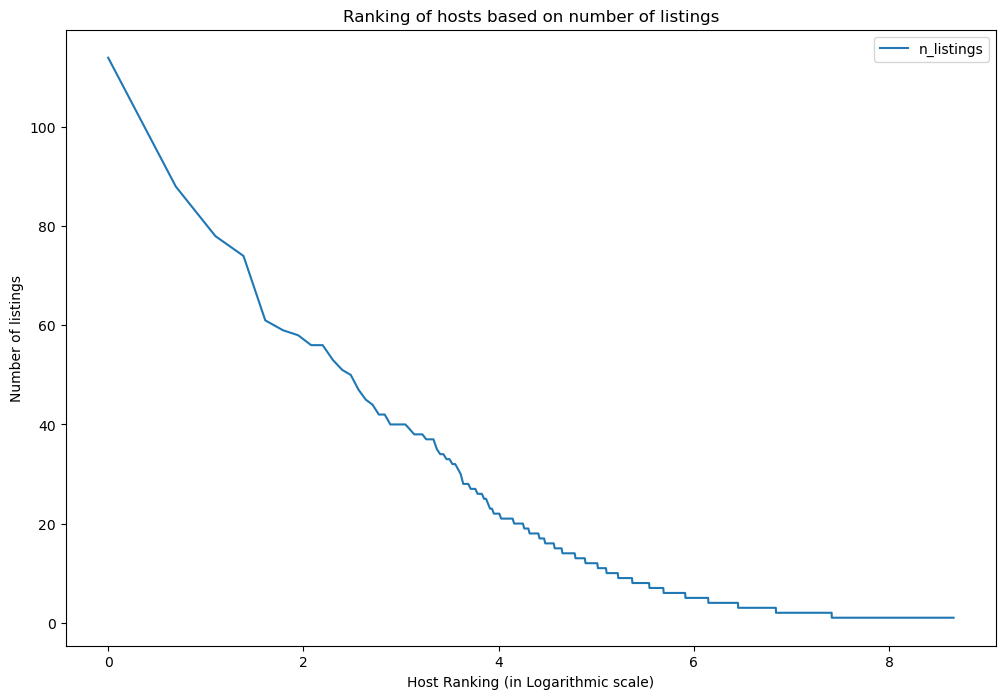

In [31]:
# plot ranking distribution plot (ranking on log scale)
by_host.plot(x='log_ranking', y='n_listings',
             title='Ranking of hosts based on number of listings',
             xlabel='Host Ranking (in Logarithmic scale)', ylabel='Number of listings',
             figsize=(12, 8))

## Question 8: Visualize Listings

In this last question we will visualize the listings using the Folium library, along with some details when the user clicks on a listing.

**Methodology:**
- Extract a small set of features from the listings dataframe to be used in the map:
    - `latitude` and `longitude`
    - `neighbourhbood_cleansed` (rename to `neighbourhood`)
    - `room_type`
    - `accomodates`
    - `price`
    - `number_of_reviews`
    - `review_scores_rating`
 
- For the map:
    - Create a Map object
    - Use as statring point the geolocation of Athens. This is `(37.983810, 23.727539)` and can be found [latlong.net website](https://www.latlong.net/place/athens-greece-22451.html)
    - Use as min_zoom the value 12 and as max_zoom=15
    - Create a MarkerCluster object and append the map
    - For every listing create an IFrame that contains the details of listing when clicked and append it onto the marker
    - Persist the output to disk (named `kostis-konstantinos-athens-airbnb-listings-map.html`)
 
**Observe that:** We will create a generic method that can be used to produce a map for any given city and dataframe. You know,
for reusability :-)

In [32]:
# define a method that generates a folium map of a city
def generate_folium_city_map(city_geolocation, zoom_start, df):
    # create the map object
    city_map = folium.Map(location=city_geolocation, zoom_start=zoom_start)

    # create the marker cluster
    marker_cluster = plugins.MarkerCluster()

    for (_, listing) in df.iterrows():
        latitude = listing['latitude']
        longitude = listing['longitude']
    
        description = f"""
          <h3> Neighbourhood:</h3> {listing['neighbourhood']}
          <h3> Name: </h3> <a href='{listing['url']}' target="_blank"> {listing['name']} </a>
          <h3> Price: </h3> {listing['price']} </h3>
          <h3> Room Type: </h3> {listing['room_type']}
          <h3> Accommodation for: </h3> {listing['accommodates']}
        """

        listing_frame = folium.IFrame(description, width=400, height=200)
        listing_popup = folium.Popup(listing_frame, max_width=600)
        folium.Marker(location=[latitude, longitude], popup=listing_popup, tooltip='Click me!').add_to(marker_cluster)
    
    # add the marker cluster to the map
    marker_cluster.add_to(city_map)

    # return the city map
    return city_map

In [33]:
# create a dataframe with data for display
listings_map_df = pd.DataFrame()

listings_map_df['latitude'] = listings_df['latitude']
listings_map_df['longitude'] = listings_df['longitude']
listings_map_df['neighbourhood'] = listings_df['neighbourhood_cleansed']
listings_map_df['name'] = listings_df['name']
listings_map_df['room_type'] = listings_df['room_type']
listings_map_df['accommodates'] = listings_df['accommodates']
listings_map_df['price'] = listings_df['price']
listings_map_df['url'] = listings_df['listing_url']

# generate the athens city map
athens_map = generate_folium_city_map([37.983810, 23.727539], 15, listings_map_df)

In [34]:
# save the athens map locally
athens_map.save('kostis-konstantinos-athens-airbnb-listings-map.html')

In [35]:
# open the map to the browser
!open kostis-konstantinos-athens-airbnb-listings-map.html

# Bonus section ( the good stuff! :-) )

So, in this section we will experiment with something different!

These listings data are really useful for practical applications such as recommendation systems. So, in this section,
we will build a small recommendation system for listings that exist in a small region of the Athens center.

So suppose, we want to build a system that given a set of criteria from the user (e.g: beds, bathrooms, number of people, price, review score) will return the top 20 results that match these criteria (more or less)
Moreover, these results will be marked on a new folium map in order for the user to be able to inspect the results :-)
No worries: the map will be persisted locally, and a magic command will launch your browser to inspect the map!

**General methodology**
- Filter listings that belong in neighbourhoods: ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ, ΑΜΠΕΛΟΚΗΠΟΙ, ΛΥΚΑΒΗΤΤΟΣ, ΓΚΥΖΗ
- Preprocess the listings dataframe to acquire the needed features (beds, bathrooms, number of people / accommodates, price, review score, url, name, neighbourhood. listing geolocation)
- For the core of the system, use a kNN-like (K-Nearest-Neighbors) approach in order to match the user given criteria with the listings and rank the top-k results properly.
  - We will use Euclidean distance when comparing listings, since the dimensions are very few. Cosine similarity may give different results but that is OK! We are creating a small and fun prototype so results may not be a hundrend percent correct.
- Then, simply use the beautiful reusable `generate_folium_city_map` function to create the map. Also, save it locally.
- Finally launch the browser with the local file map, using the cool magic command `!open kostis-konstantinos-bonus-section-recommender-listings-map.html`

In [36]:
# A proof of concept recommendation system :-)

# create the dataset to work with
dataset = pd.DataFrame()

# get needed features
dataset['name'] = listings_df.name
dataset['url'] = listings_df.listing_url
dataset['neighbourhood'] = listings_df.neighbourhood_cleansed
dataset['latitude'] = listings_df.latitude
dataset['longitude'] = listings_df.longitude
dataset['room_type'] = listings_df.room_type
dataset['beds'] = listings_df.beds
dataset['bathrooms'] = listings_df.bathrooms_text.str.extract('(\d+)')
dataset['accommodates'] = listings_df.accommodates
dataset['review_score'] = listings_df.review_scores_rating
dataset['price'] = listings_df.price

# keep only listings for neighbourhoods of interest
dataset = dataset[dataset['neighbourhood'].isin(['ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΑΜΠΕΛΟΚΗΠΟΙ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΓΚΥΖΗ'])]

# make price numeric
dataset['price'] = price_to_numeric(dataset.price)

# drop nan
dataset.dropna(inplace=True)

# reset the index
dataset = dataset.reset_index(drop=True)

class Recommender:
    """An aribnb listings recommender."""

    def __init__(self, df):
        self.df = df
        self.features = ['beds', 'bathrooms', 'accommodates', 'review_score', 'price']

    def recommend(self, query, top_k=20):
        """Compute a distance matrix"""
        feature_matrix = self.df[self.features].copy()
        distance_matrix = euclidean_distances(feature_matrix, [query])
        distance_matrix_df = pd.DataFrame(distance_matrix, columns=['euclidean_distance'])
        results = distance_matrix_df.sort_values(by='euclidean_distance')[:top_k]
        indices = results.index.values

        return self.df.iloc[indices]

In [37]:
# initialize the recommender
r = Recommender(dataset)

# set the query (beds: 2, bathrooms: 1, accommodates: 2, review_score: 4.2, price: 60)
# and retrieve the results
recommendations = r.recommend([2, 1, 2, 4.2, 60])

In [38]:
# create a folium map with the recommendations
recommendations_map = generate_folium_city_map([37.983810, 23.727539], 15, recommendations)
recommendations_map.save('kostis-konstantinos-bonus-section-recommender-listings-map.html')

In [39]:
# open the map in the browser and inspect the results
!open kostis-konstantinos-bonus-section-recommender-listings-map.html